In [69]:
import os
import pandas as pd
from datetime import datetime

In [70]:
os.getcwd()

'/Users/sohantha/Documents/Sohan Thakur/Personal/Bellevue University/DSC680/Week_1_4'

In [71]:
base_path = os.getcwd()

In [72]:
!ls

House_price_predction.ipynb    White_paper_week1_4_final.docx
Housing_data.xlsx              White_paper_week1_4_v1.pdf
Milestone_1_proposal.docx      ~$Housing_data.xlsx
Milestone_1_proposal.pdf       ~$ite_paper_week1_4_final.docx
Week1                          ~$lestone_1_proposal.docx
White_paper_week1_4_draft.docx


In [73]:
housing_data_path = base_path + '/' + "Housing_data.xlsx"

In [74]:
df_housing = pd.read_excel(housing_data_path)

In [75]:
df_housing_az = df_housing[df_housing.region =='Arizona']

In [76]:
df_housing_az.head(10)

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
12,2021-10-01,2021-10-31,30,state,4,5,f,Arizona,NaN,Arizona,...,0.193427,0.198330,0.016774,-0.010402,0.373044,0.026064,0.088290,West Region,NaN,2021-11-21 14:35:51
119,2021-10-01,2021-10-31,30,state,4,5,f,Arizona,NaN,Arizona,...,0.117056,0.204950,-0.001282,-0.008313,0.372440,0.057598,0.055568,West Region,NaN,2021-11-21 14:35:51
137,2021-10-01,2021-10-31,30,state,4,5,f,Arizona,NaN,Arizona,...,0.089910,0.238781,0.000571,0.048135,0.343137,0.011735,0.009351,West Region,NaN,2021-11-21 14:35:51
155,2021-10-01,2021-10-31,30,state,4,5,f,Arizona,NaN,Arizona,...,-0.038998,0.208092,0.016232,0.016981,0.266689,0.066207,-0.011131,West Region,NaN,2021-11-21 14:35:51
205,2021-10-01,2021-10-31,30,state,4,5,f,Arizona,NaN,Arizona,...,0.098118,0.232869,0.001629,0.038991,0.346665,0.016436,0.018113,West Region,NaN,2021-11-21 14:35:51
227,2021-09-01,2021-09-30,30,state,4,5,f,Arizona,NaN,Arizona,...,0.166862,0.181034,0.000026,0.002281,0.347420,-0.021896,0.048631,West Region,NaN,2021-11-21 14:35:51
237,2021-09-01,2021-09-30,30,state,4,5,f,Arizona,NaN,Arizona,...,0.189740,0.206233,-0.001128,0.027512,0.314841,-0.066471,0.001117,West Region,NaN,2021-11-21 14:35:51
267,2021-09-01,2021-09-30,30,state,4,5,f,Arizona,NaN,Arizona,...,0.133403,0.238211,0.006299,0.069969,0.331402,-0.035584,-0.016513,West Region,NaN,2021-11-21 14:35:51
345,2021-09-01,2021-09-30,30,state,4,5,f,Arizona,NaN,Arizona,...,0.138425,0.231240,0.004996,0.061552,0.330228,-0.037267,-0.010384,West Region,NaN,2021-11-21 14:35:51
352,2021-09-01,2021-09-30,30,state,4,5,f,Arizona,NaN,Arizona,...,-0.035714,0.192090,-0.040714,0.014124,0.206993,-0.064015,0.019305,West Region,NaN,2021-11-21 14:35:51


In [77]:
df_housing_az_sfr = df_housing_az[df_housing_az.property_type =='Single Family Residential']

FACEBOOK PROPHET

In [78]:
import pandas as pd
from prophet import Prophet

In [79]:
df_prophet_format = df_housing_az_sfr[['period_begin','median_sale_price']]
df_prophet_format = df_prophet_format.rename(columns = {'period_begin':'ds','median_sale_price':'y'})

In [80]:
df_prophet_format.head(10)

,ds,y
137,2021-10-01,433200
267,2021-09-01,425800
474,2021-08-01,422700
707,2021-07-01,420800
1141,2021-06-01,418900
1276,2021-05-01,408300
1630,2021-04-01,394100
1786,2021-03-01,379900
1927,2021-02-01,368300
2249,2021-01-01,355600


In [81]:
#considering data till 2020 as test
df_prophet_format_test = df_prophet_format[df_prophet_format.ds < '2021-01-01']

In [82]:
#Fitting prophet model with changepoint prior scale as 0.3
m = Prophet(changepoint_prior_scale=0.3)
m.fit(df_prophet_format_test)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [83]:
#predicting 2yrs of home price
future = m.make_future_dataframe(periods=730)

In [84]:
#function to get date of the month from date
def get_first_day(date):
    return str(date)[8:10]
def get_first_day_date(date):
    return str(date)[0:7]+'-01'

In [85]:
#Forecasting next 2 yrs using trained model
forecast = m.predict(future)
forrecast_monthly = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

forrecast_monthly['date'] = forrecast_monthly['ds'].apply(lambda x : get_first_day(x))

<ipython-input-85-a426593978a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forrecast_monthly['date'] = forrecast_monthly['ds'].apply(lambda x : get_first_day(x))


In [86]:
#Will consider the price on 28th of the month as the price of that month(to accomodate Feb)
forrecast_monthly = forrecast_monthly[forrecast_monthly['date'] =='28']
forrecast_monthly['ds'] = forrecast_monthly['ds'].apply(lambda x : get_first_day_date(x))

#In order to consider the unexpected increase in home proce, will use a factor of 1.1
forrecast_monthly['final_predicted_price'] = forrecast_monthly['yhat_upper']* 1.1

In [87]:
forrecast_monthly

,ds,yhat,yhat_lower,yhat_upper,date,final_predicted_price
134,2020-12-01,344196.463011,339900.189446,348679.431075,28,383547.374183
165,2021-01-01,336173.057308,331625.737171,340369.333044,28,374406.266349
196,2021-02-01,353694.095859,349708.277566,358219.045060,28,394040.949566
224,2021-03-01,336492.200151,332328.086233,340728.701047,28,374801.571151
255,2021-04-01,383627.080864,379001.089233,387955.221162,28,426750.743278
285,2021-05-01,373410.134637,368690.905418,378078.899201,28,415886.789121
316,2021-06-01,368620.655966,363551.934315,373510.668071,28,410861.734879
346,2021-07-01,354745.223993,349833.976858,359811.176971,28,395792.294668
377,2021-08-01,373044.140707,367501.658560,378766.343627,28,416642.977990
408,2021-09-01,379819.795014,374163.663289,385284.451049,28,423812.896154


In [224]:
forrecast_monthly_final = forrecast_monthly[['ds','final_predicted_price']].rename(columns = {'final_predicted_price':'y_pred'})
forrecast_monthly_final['ds'] = forrecast_monthly_final['ds'].astype('datetime64[ns]')

In [229]:
forecast_monthly_final_comp = pd.merge(forrecast_monthly_final,df_prophet_format,how = 'inner',on=['ds'])
forecast_monthly_final_comp['error'] = forecast_monthly_final_comp['y_pred'] - forecast_monthly_final_comp['y'] 
forecast_monthly_final_comp['error'].sum()


60713.54172434384

In [230]:
forecast_monthly_final_comp.head(20)

,ds,y_pred,y,error
0,2020-12-01,383370.746714,351800,31570.746714
1,2021-01-01,374638.024824,355600,19038.024824
2,2021-02-01,393692.566491,368300,25392.566491
3,2021-03-01,375165.241634,379900,-4734.758366
4,2021-04-01,426801.639409,394100,32701.639409
5,2021-05-01,415976.281784,408300,7676.281784
6,2021-06-01,410605.432406,418900,-8294.567594
7,2021-07-01,395719.613005,420800,-25080.386995
8,2021-08-01,416477.891388,422700,-6222.108612
9,2021-09-01,424200.086703,425800,-1599.913297


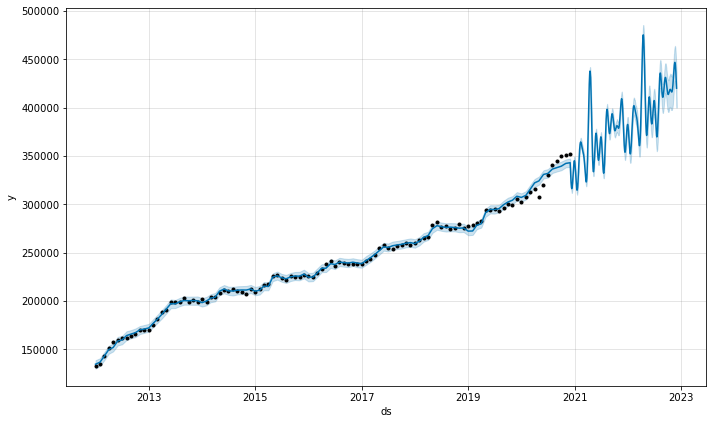

In [216]:
fig1 = m.plot(forecast)


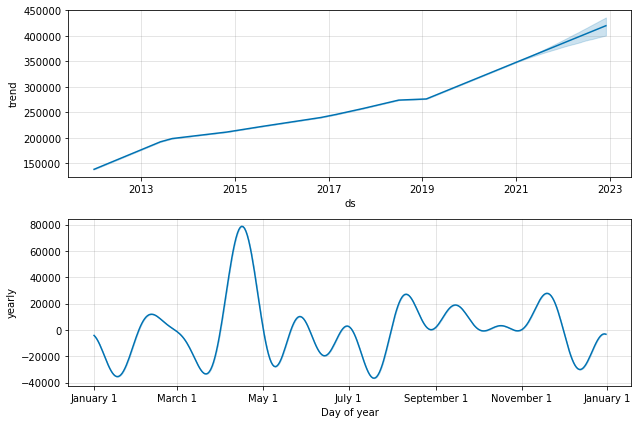

In [217]:
fig2 = m.plot_components(forecast)


In [232]:
#Prediction for 12 months in 2022
forrecast_monthly_final[forrecast_monthly_final.ds >='2022-01-01']

,ds,y_pred
530,2022-01-01,419309.356300
561,2022-02-01,440812.670115
589,2022-03-01,420370.028549
620,2022-04-01,476647.551373
650,2022-05-01,465185.996798
681,2022-06-01,459603.069022
711,2022-07-01,445179.568502
742,2022-08-01,467444.343586
773,2022-09-01,476211.591801
803,2022-10-01,475431.974397


ARIMA

In [12]:
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot


<ipython-input-12-9a991ae046d0>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [31]:
df_prophet_format_timed = df_prophet_format.set_index('ds')
housing_series = df_prophet_format_timed.squeeze()

In [32]:
housing_series

ds
2021-10-01    433200
2021-09-01    425800
2021-08-01    422700
2021-07-01    420800
2021-06-01    418900
               ...  
2012-05-01    157400
2012-04-01    151300
2012-03-01    143000
2012-02-01    134700
2012-01-01    132200
Name: y, Length: 118, dtype: int64

In [61]:
model_arima =ARIMA(housing_series,order =(3,2,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

/Users/sohantha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  warnings.warn('No frequency information was'
/Users/sohantha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/sohantha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  warnings.warn('No frequency information was'
/Users/sohantha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  118
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1160.164
Date:                Fri, 14 Jan 2022   AIC                           2332.327
Time:                        20:39:45   BIC                           2348.849
Sample:                             0   HQIC                          2339.034
                                - 118                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4788      0.546     -0.878      0.380      -1.548       0.590
ar.L2         -0.4151      0.482     -0.861      0.389      -1.360       0.529
ar.L3         -0.0246      0.011     -2.186      0.0

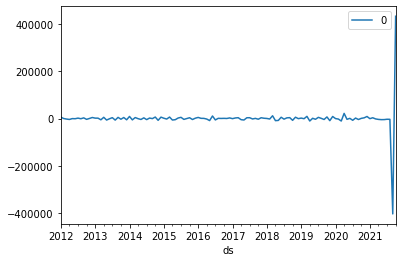

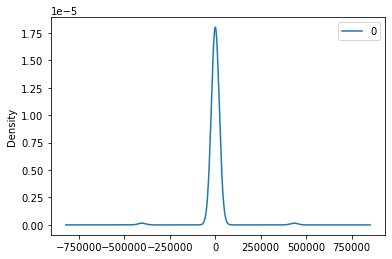

                   0
count     118.000000
mean      168.263590
std     55006.304407
min   -404211.957603
25%     -3744.222302
50%       165.629328
75%      3149.422366
max    433200.000000


In [62]:
residuals = DataFrame(model_arima_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [63]:
output = model_arima_fit.forecast(365)

/Users/sohantha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [64]:
output

118    129481.274237
119    126669.311912
120    123850.039300
121    121078.356214
122    118289.216753
           ...      
478   -875524.340197
479   -878315.936184
480   -881107.532172
481   -883899.128160
482   -886690.724148
Length: 365, dtype: float64

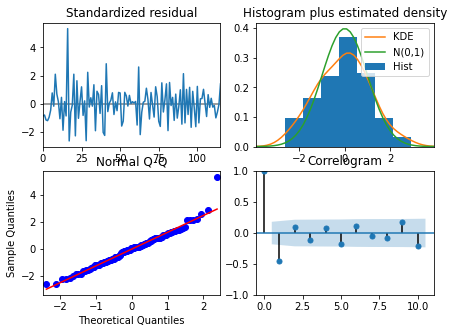

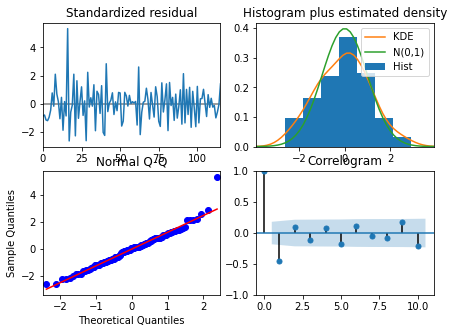

In [67]:
model_arima_fit.plot_diagnostics(figsize=(7,5))


Observations:  
Standaedized residual  : The residual errors seem to fluctuate around a mean of zero and have a SIGNIFICANT VARIATION.

Estimated denisty : The density plot suggest normal distribution with mean zero.

Normal Q Q: All the dots should fall perfectly in line with the red line. But there are significant deviations hence the prediction is highly skewed.

Correlogram: The ACF plot shows the residual errors are autocorrelated which means that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.
    